In [37]:
#imports
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# ml preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# ml models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [38]:
# load the data
data_path = 'Datasets/2021-2023/CSB_2021-2023_Daily_Weather.csv'
weather_data = pd.read_csv(data_path)

In [39]:
# convert Date to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

In [40]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            911 non-null    datetime64[ns]
 1   Casual                          911 non-null    int64         
 2   Member                          911 non-null    int64         
 3   Total_rides                     911 non-null    int64         
 4   weathercode (wmo code)          911 non-null    int64         
 5   temperature_2m_mean (°C)        911 non-null    float64       
 6   apparent_temperature_mean (°C)  911 non-null    float64       
 7   windspeed_10m_max (km/h)        911 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 57.1 KB


In [41]:
weather_data.isna().sum()

Date                              0
Casual                            0
Member                            0
Total_rides                       0
weathercode (wmo code)            0
temperature_2m_mean (°C)          0
apparent_temperature_mean (°C)    0
windspeed_10m_max (km/h)          0
dtype: int64

In [42]:
weather_data.dropna(inplace=True)

In [43]:
weather_data.describe()

,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h)
count,911,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,2022-04-01 00:00:00,3607.552141,5372.278814,8979.830955,28.105379,14.019868,12.792536,15.684852
min,2021-01-01 00:00:00,174.000000,323.000000,497.000000,0.000000,-9.100000,-15.200000,5.600000
25%,2021-08-16 12:00:00,1909.500000,3908.000000,6240.500000,2.000000,6.600000,2.900000,11.700000
50%,2022-04-01 00:00:00,3336.000000,5411.000000,8991.000000,3.000000,14.300000,12.500000,14.500000
75%,2022-11-14 12:00:00,5004.000000,6843.500000,11926.500000,55.000000,22.000000,22.800000,18.900000
max,2023-06-30 00:00:00,12839.000000,10657.000000,19531.000000,75.000000,30.100000,34.700000,36.700000
std,NaN,2087.382795,2046.922096,3778.061891,28.319602,8.953601,11.632842,5.444250


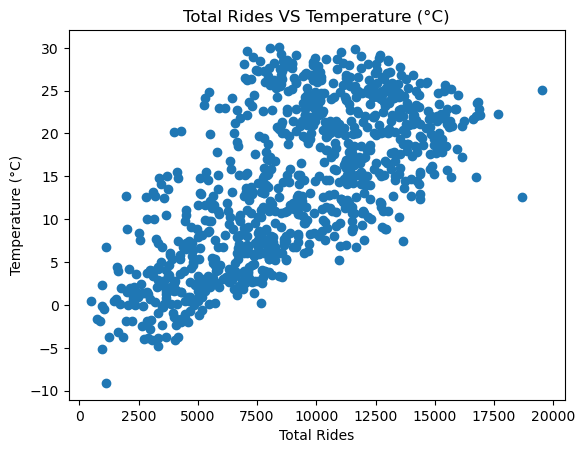

In [44]:
# plot the total rides and temperature
plt.scatter(weather_data['Total_rides'], weather_data['temperature_2m_mean (°C)'])

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

plt.show()

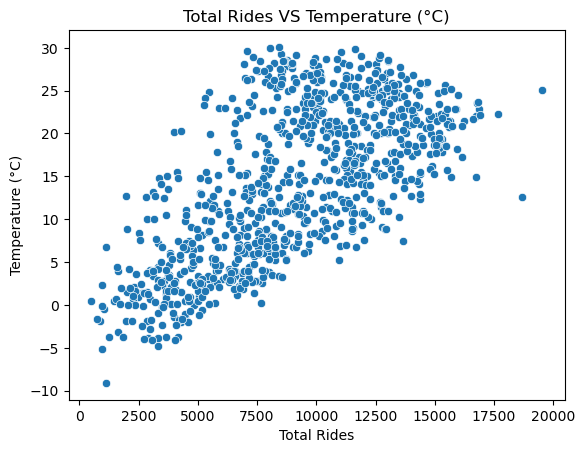

In [45]:
# plot the total rides and temperature
sns.scatterplot(x='Total_rides', y='temperature_2m_mean (°C)', data=weather_data)

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

plt.show()

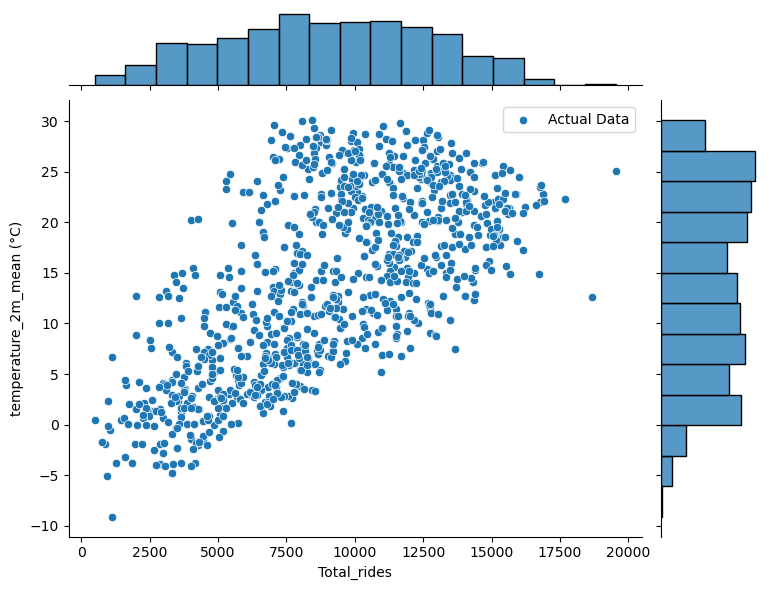

In [46]:
# set the width and height of the joint plot
width, height = 8, 6

# plot the total rides and temperature
joint_plot = sns.jointplot(x='Total_rides', y='temperature_2m_mean (°C)', data=weather_data, label='Actual Data', height=height, ratio=5)

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

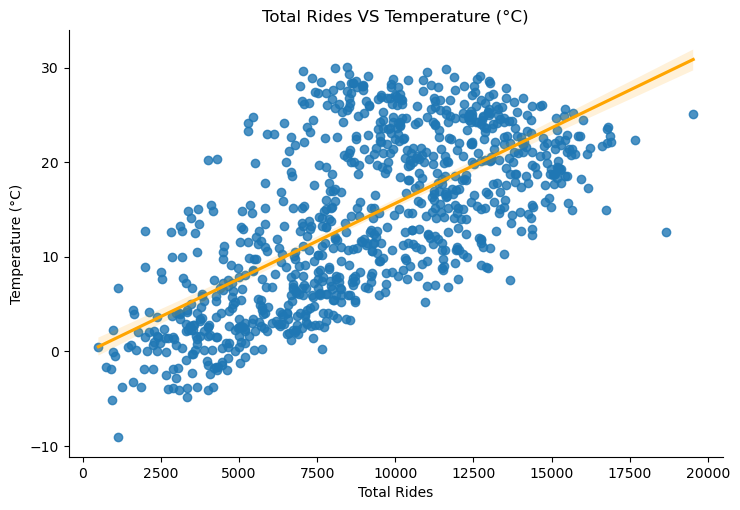

In [47]:
# create a scatter plot of total rides and temperature, with a regression line fitted to the data
sns.lmplot(x='Total_rides', y='temperature_2m_mean (°C)', data=weather_data, line_kws={'color': 'orange'}, aspect=1.5)

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

plt.show()

In [48]:
# split the data into features (X) and target variable (y)
X = weather_data['temperature_2m_mean (°C)'] # features
y = weather_data['Total_rides']  # target variable

In [49]:
X = X.values.reshape(-1, 1)

In [50]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
# train the model 

# initialize the Linear Regression model
lr_rides_temp = LinearRegression()

# train the model
lr_rides_temp.fit(X_train, y_train)

LinearRegression()

In [52]:
# make predictions on the test set
y_pred = lr_rides_temp.predict(X_test)

In [53]:
# prepare a predictions df to plot the lr line
predictions = pd.DataFrame(X_test, columns=['temperature_2m_mean (°C)'])
predictions['prediction'] = y_pred
predictions

,temperature_2m_mean (°C),prediction
0,8.8,7600.748314
1,5.8,6772.232707
2,26.8,12571.841957
3,22.6,11411.920107
4,22.8,11467.154481
...,...,...
178,29.5,13317.506004
179,23.6,11688.091976
180,24.8,12019.498219
181,16.0,9589.185771


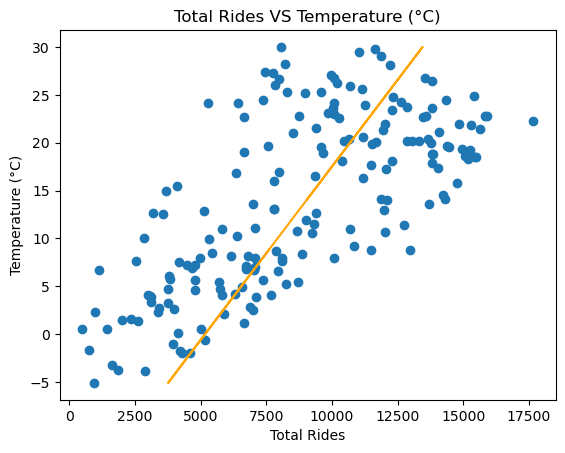

In [54]:
# plot the total rides and temperature
plt.scatter(y_test, X_test)

# plot the regression line
plt.plot(y_pred, X_test, color="orange")

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

plt.show()

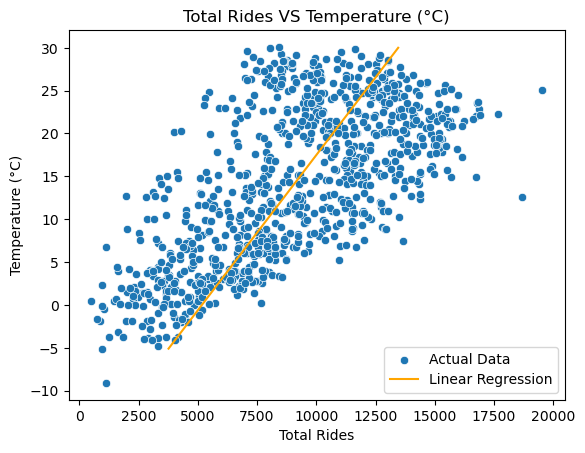

In [55]:
# scatter plot of the actual data points
sns.scatterplot(x='Total_rides', y='temperature_2m_mean (°C)', data=weather_data, label='Actual Data')

# overlay the linear regression line
sns.lineplot(x='prediction', y='temperature_2m_mean (°C)', data=predictions, color='orange', label='Linear Regression')

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.legend()
plt.show()


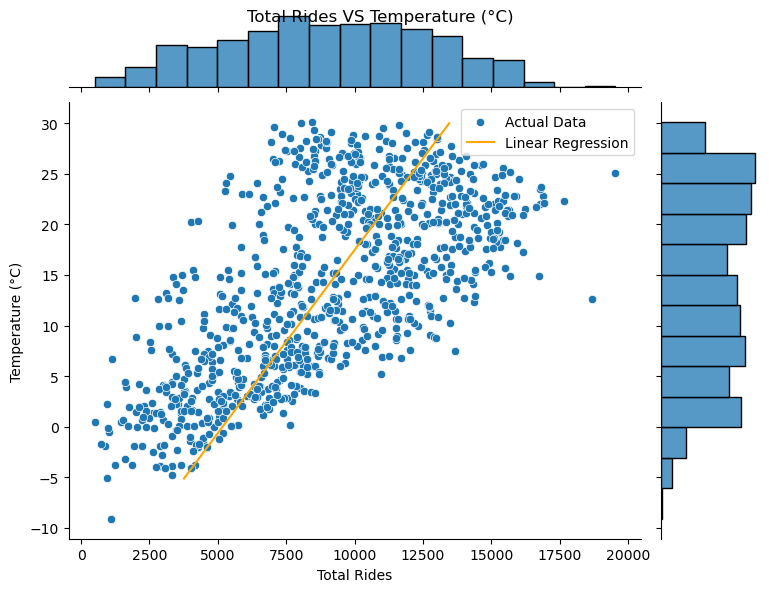

In [56]:
# set the width and height of the joint plot
width, height = 8, 6

# scatter plot of the actual data points
joint_plot = sns.jointplot(x='Total_rides', y='temperature_2m_mean (°C)', data=weather_data, label='Actual Data', height=height, ratio=5)

# overlay the linear regression line
sns.lineplot(x='prediction', y='temperature_2m_mean (°C)', data=predictions, color='orange', label='Linear Regression')

# set plot labels and title
plt.suptitle("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

# show the plot
plt.legend()
plt.show()

In [57]:
# predict the rides for one temp sample

#sample_temp = X_test.sample()
sample_temp = pd.DataFrame({'temperature_2m_mean (°C)':[25.0]})
print('sample temperature:\n', sample_temp)
print()
print('prediction:\n', lr_rides_temp.predict(sample_temp))

sample temperature:
    temperature_2m_mean (°C)
0                      25.0

prediction:
 [12074.73259301]


/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [58]:
# train the model 

# initialize the Linear Regression model
rf_rides_temp = RandomForestClassifier()

# train the model
rf_rides_temp.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# make predictions on the test set
y_pred = rf_rides_temp.predict(X_test)

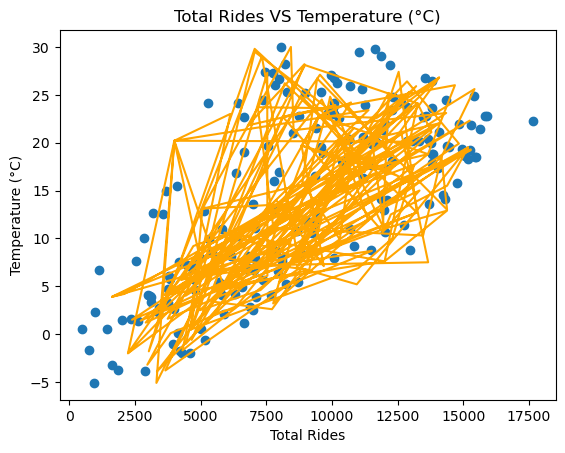

In [60]:
# plot the total rides and temperature
plt.scatter(y_test, X_test)

# plot the regression line
plt.plot(y_pred, X_test, color="orange")

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

plt.show()

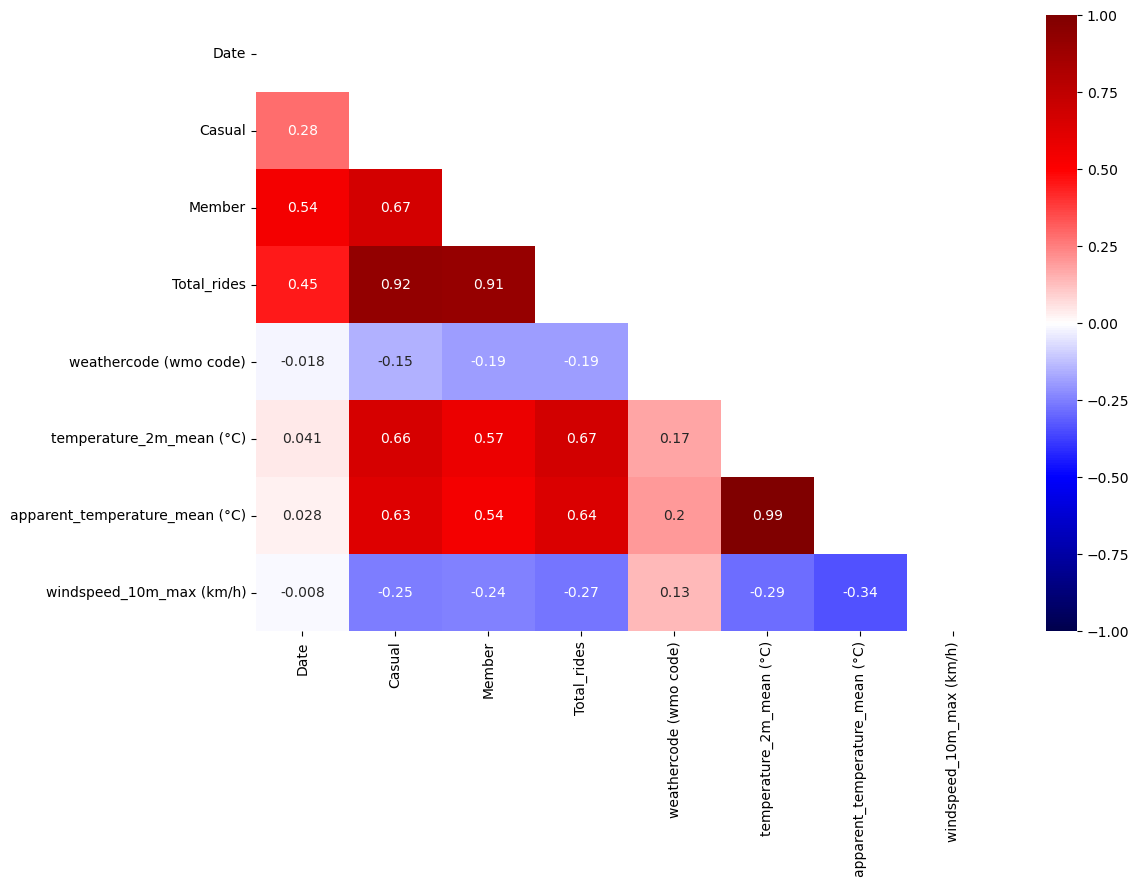

In [61]:
plt.figure(figsize=(12,8))
corr= weather_data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [62]:
# split the data into features (X) and target variable (y)
#X = weather_data['temperature_2m_mean (°C)'] # features
#y = weather_data['Total_rides']  # target variable

In [63]:
# reshape the data
#X = X.values.reshape(-1, 1)
#y = y.values.reshape(-1, 1)

In [64]:
# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
# transform features to include polynomial terms up to degree 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)                                 # why not X_train?

# Train a linear regression model using the polynomial features
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y)

LinearRegression()

In [66]:
# Generate predictions using the trained model
X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)


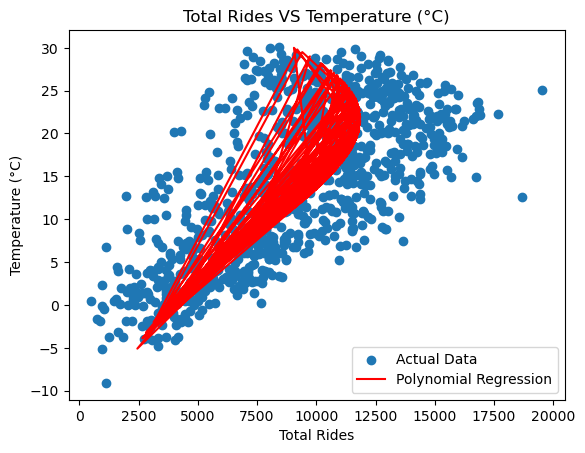

In [67]:
# plot the original data and the polynomial regression line
plt.scatter(y, X, label='Actual Data')
plt.plot(y_pred, X_test, color='red', label='Polynomial Regression')

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

plt.legend()
plt.show()


In [68]:
# prepare a predictions df to plot the lr line
predictions = pd.DataFrame(X_test, columns=['temperature_2m_mean (°C)'])
predictions['prediction'] = y_pred
predictions

,temperature_2m_mean (°C),prediction
0,8.8,7867.524627
1,5.8,6389.722408
2,26.8,10860.229095
3,22.6,11823.934590
4,22.8,11809.740543
...,...,...
178,29.5,9404.976481
179,23.6,11723.269195
180,24.8,11500.348532
181,16.0,10893.118193


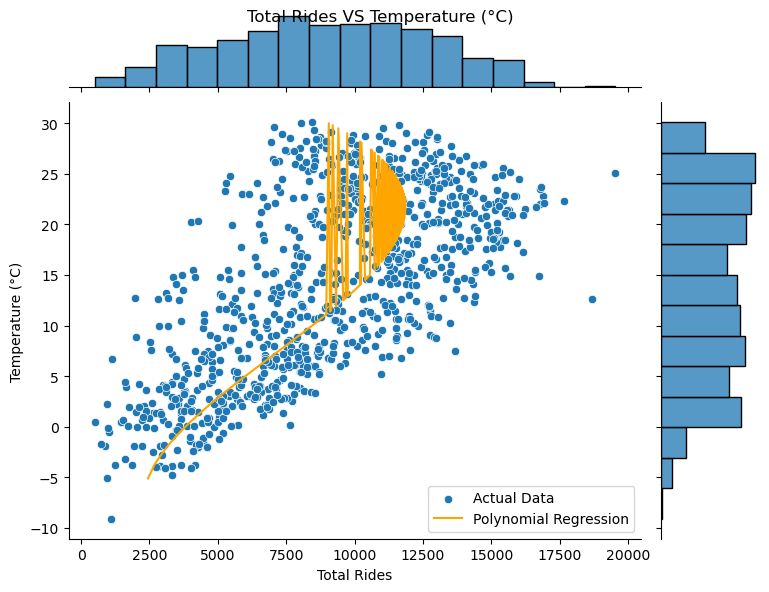

In [69]:
# set the width and height of the joint plot
width, height = 8, 6

# scatter plot of the actual data points
joint_plot = sns.jointplot(x='Total_rides', y='temperature_2m_mean (°C)', data=weather_data, label='Actual Data', height=height, ratio=5)

# overlay the linear regression line
sns.lineplot(x='prediction', y='temperature_2m_mean (°C)', data=predictions, color='orange', label='Polynomial Regression')

# set plot labels and title
plt.suptitle("Total Rides VS Temperature (°C)")
plt.xlabel('Total Rides')
plt.ylabel('Temperature (°C)')

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

# show the plot
plt.legend()
plt.show()

In [78]:
# predict the rides for one temp sample for polynomial regression

#sample_temp = X_test.sample()
sample_temp = pd.DataFrame({'temperature_2m_mean (°C)':[29.5]})
sample_poly = poly_features.transform(sample_temp)
print('sample temperature:\n', sample_poly)
print()
print('prediction:\n', poly_regression.predict(sample_poly))

sample temperature:
 [[1.0000000e+00 2.9500000e+01 8.7025000e+02 2.5672375e+04]]

prediction:
 [9404.97648081]


/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [71]:
X.shape

(911, 1)

In [72]:
y.shape

(911,)

In [73]:
X_train.shape

(728, 1)

In [74]:
y_train.shape

(728,)

In [75]:
X_test.shape

(183, 1)

In [76]:
y_test.shape

(183,)